In [20]:
from __future__ import division
import numpy
from collections import OrderedDict
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def PartialDerivatives(func, dpar, *params):
    '''
    PartialDerivatives(func, dpar, *params) # or **params for dictionary notation.

    func -- str, the function equation.  Not name, but the math of the function.  Make sure the parameters within the function match all of those parameters within the parameter list. 
    *** WARNING ***: sympy requires ln for natural log and log for log base 10 as input.  However, it outputs log and log10.

    dpar -- str, parameter derivative is wrt. example: 'alpha'

    params -- list of strings, pass a list of strings containing the parameter names.  Make sure they match all of those included in the func.  energy and enorm are included by default, but it's not a bad idea to include them anyhow to get used to the notation.

    old:  params -- dict, pass to params with **dictname, where dictname is a dictionary of all the parameters the function takes.

    EXAMPLE:  
    lower = 'energy * norm_band *((energy/enorm)**alpha)*(exp(-((energy*(2.+alpha))/epeak)))'
    pars = 'alpha beta epeak norm_band enorm energy'.split(' ')

    PartialDerivatives(lower, 'epeak', *pars)
    '''
    import sympy
    from sympy import mpmath, integrate, diff, exp, log, ln, sqrt, lambdify
    from sympy import Function, Symbol
    # in this program, sympy uses log for log10 and ln for natural log.
    from sympy.parsing.sympy_parser import parse_expr
    from sympy.mpmath import atanh
    enorm		= Symbol('enorm', real=True)
    energy		= Symbol('energy', real=True)

    # for par in params.keys():  # old dictionary notation
    for par in params:
        locals()[par] = Symbol('%s'%par, real=True)

    answer	= diff(eval(func), eval(dpar), method='quad')
    return answer

In [3]:
'''********   Propagate BAND errors   *********'''
pars = 'alpha beta efold norm'.split(' ')
lower = 'norm * energy * ((energy/enorm)**alpha)*(exp(-(energy/efold)))'
upper = 'norm * energy * ((((alpha-beta)*efold)/enorm)**(alpha-beta)) * (exp(beta-alpha))*((energy/enorm)**beta)'

In [4]:
energy = numpy.logspace(1, 8, 10000)

In [5]:
from numpy import exp, log

In [6]:
#for name in pars:
dpar = 'alpha'
out_lo = str(PartialDerivatives(lower, str(dpar), *pars))
out_up = str(PartialDerivatives(upper, str(dpar), *pars))
alpha = -1.26
beta = -2.23
efold = 514.93
enorm = 100.0
norm = 0.17
y1 = eval(lower) + eval(upper)
y2 = eval(out_lo) + eval(out_up)
x = energy

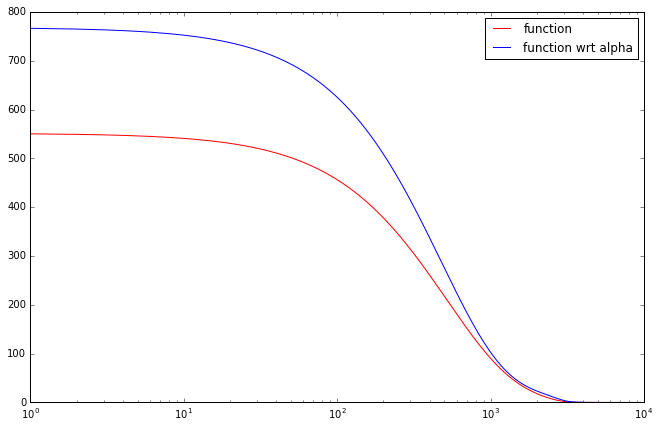

In [13]:
fig = plt.figure(figsize=(11,7))

#plt.hlines(0, 10, 100000000, hold=True)#colors='k', linestyles='solid')
plt.plot(y1, color='red', label='function')
plt.plot(y2, color='blue', label='function wrt alpha')
#plt.ylim(-60, 800)
#plt.xlim(5, 5E+7)
plt.xscale('log')
#plt.yscale('log')
plt.legend(loc='best')


#plt.ylim = [y.min(), y.max()]

In [23]:
# This version of the band function is N(E), the Photon Flux Density, or known as model out of model, emodel, and eemodel.
# This version 
def bandA(Energy, **Pars):
    alpha = round(float(Pars['alpha']), 5)
    beta = round(float(Pars['beta']), 5)
    efold = round(float(Pars['efold']), 5) # efolding energy
    norm = round(float(Pars['norm']), 5)
    eng = float(Energy)

    eqn = []
    if eng <= ((alpha-beta)*efold):
        eqn = norm*((1./100.)**(alpha))*(eng**alpha)*(numpy.exp(-(eng/efold)))
        return eqn

    else:
        eqn = norm*((1./100.)**(alpha))*((eng**beta) * numpy.exp(-(alpha-beta)) * (((alpha-beta)*efold)**(alpha-beta)))
        return eqn

def bandB(Energy, **Pars):
    alpha = round(float(Pars['alpha']), 5)
    beta = round(float(Pars['beta']), 5)
    efold = round(float(Pars['efold']), 5) # efolding energy
    norm = round(float(Pars['norm']), 5)
    eng = float(Energy)

    eqn = []
    if eng <= ((alpha-beta)*efold):
        eqn = norm*eng*((1./100.)**(alpha))*(eng**alpha)*(numpy.exp(-(eng/efold)))
        return eqn

    else:
        eqn = norm*eng*((1./100.)**(alpha))*((eng**beta) * numpy.exp(-(alpha-beta)) * (((alpha-beta)*efold)**(alpha-beta)))
        return eqn

def bandC(Energy, **Pars):
    alpha = round(float(Pars['alpha']), 5)
    beta = round(float(Pars['beta']), 5)
    efold = round(float(Pars['efold']), 5) # efolding energy
    norm = round(float(Pars['norm']), 5)
    eng = float(Energy)

    eqn = []
    if eng <= ((alpha-beta)*efold):
        eqn = norm*(eng**2)*((1./100.)**(alpha))*(eng**alpha)*(numpy.exp(-(eng/efold)))
        return eqn

    else:
        eqn = norm*(eng**2)*((1./100.)**(alpha))*((eng**beta) * numpy.exp(-(alpha-beta)) * (((alpha-beta)*efold)**(alpha-beta)))
        return eqn



In [24]:
params = OrderedDict()

params.update({'alpha':-1.0286698070834475})
params.update({'beta':-2.2003327469378235})
params.update({'efold':527.5755660475579})
params.update({'norm':0.01748869026041366})

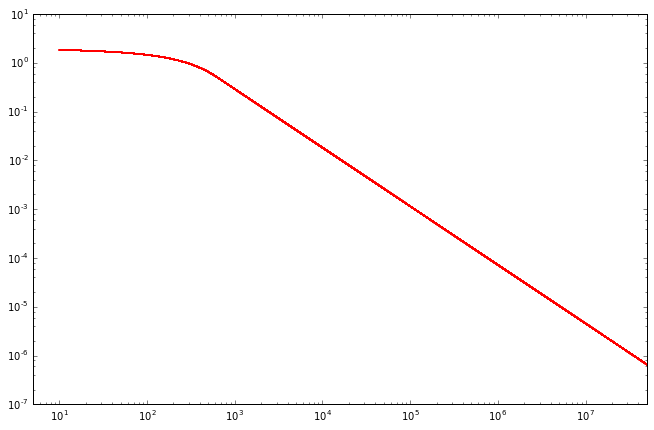

In [25]:
plt.figure(figsize=(11,7))
for i in energy:
    plt.plot(i,  bandB(i, **params), marker='.', markersize=2,  color='red')

#plt.ylim(1E-13, 1E-12)
plt.xlim(5, 5E+7)
plt.xscale('log')
plt.yscale('log')

In [ ]:
def wrt_param(energy):
    if energy < ((alpha-beta)*efold):
        out = str(PartialDerivatives(lower, str(dpar), *pars))
        return eval(out)
    else:
        out = str(PartialDerivatives(upper, str(dpar), *pars))
        return eval(out)

In [ ]:
for name in pars:
    dpar = name
    print wrt_param
    print ""
    #ptd_wrt_param = integrate.quad(wrt_param, emin_kcor, emax_kcor, limit=1000000)

In [ ]:
ppars = pars[0:nPars]
Eiso_wrt_params = []
for ppar in ppars:
    dpar = ppar
    ptd_wrt_param = integrate.quad(wrt_param, emin_kcor, emax_kcor, limit=1000000)
    Eiso_wrt_params.append(ptd_wrt_param[0] * ((4. * math.pi * DL_cm**2 * (t90start-t90stop))/(1.+z)))
partials = Eiso_wrt_params
JacobErr, EisoErr = CalcErrors(partials, COVARMAT)